

# Project: Investigate a Dataset - [TMDB MOVIES DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction : I have chosen the (TMDb movie data!) dataset from the given link below :-
https://docs.google.com/document/d/e/2PACX1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?
embedded=True (https://docs.google.com/document/d/e/2PACX1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?
embedded=True)

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue.(https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis


Question 1: Which genres are currently the most popular?
Question 2: Which month has the most and least number of movies released?
Question 3: What kinds of properties are related with high-grossing films?
Question 4: Which actors have played the most roles in the most films, and which directors have directed the most films?



In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from datetime import datetime

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
df.shape # checking the total number of rows and columns

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [29]:
 df['keywords'].head() #columns in df.head() is actually shown here as it is not properly shown there

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [30]:
df.info() #checking the number of rows in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [31]:
df.isnull().sum()  #checking the number of null values in each column of the dataset


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [32]:
#Total number of rows containing null values
df.isnull().T.any().T.sum()

8874

In [33]:

#checking the homepage column
df['homepage'].head(5)


0                        http://www.jurassicworld.com/
1                          http://www.madmaxmovie.com/
2       http://www.thedivergentseries.movie/#insurgent
3    http://www.starwars.com/films/star-wars-episod...
4                             http://www.furious7.com/
Name: homepage, dtype: object

In [34]:
 #Still checking the homepage column
df['homepage'].tail()

10861    NaN
10862    NaN
10863    NaN
10864    NaN
10865    NaN
Name: homepage, dtype: object

The homepage contains the official website of the movie

In [35]:
#checking if there are any duplicate values
df.duplicated().all()


False

In [36]:
#checking total duplicate values
df.duplicated().sum()


1

In [37]:
#checking the number of unique values 
df.nunique()


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [38]:
 #checking the data type of every column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning

1.Duplicate values are removed.

2.Null values with respect to primary key ('imdb_id) were removed.

3.Extraneous Columns are removed.

4.Ir-regular data-types were changed to suitable data types.


 

Dropping duplicates

In [39]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop_duplicates(inplace=True)
#confirming changes
df.duplicated().sum()
# The number of duplicate values in the dataframe is Zero


0

Treating the null values

In [40]:
#checking the rows where imdb_id is null
df[df['imdb_id'].isnull()].head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.0,0.0


From my perspective, the accompanying figure shows that practically every row contains null values, hence removing them is sufficient.

In [41]:
#dropping of null values corresponding to the imdb_id column 
df.dropna(subset=['imdb_id'],inplace=True)
#Trying to confirming changes
df.isnull().sum()


id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Because the rest of the data is rather clean, I'm not going to remove the null values from the other columns.

Dropping Extraneous Columns

In [42]:
#removing columns that aren't needed
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


I decided to drop the following following columns as that will not provide any useful
information :- 'id' 'homepage' 'keywords' 'tagline' 'overview

In [43]:
#creating a list for the columns to be dropped
dlist = [ 'id', 'homepage', 'keywords', 'tagline','overview']
#dropping the various columns
df.drop(dlist, axis=1, inplace=True)
#confirming changes
df.head(1)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Changing datatypes

In [44]:
#checking the dtype of 'release_date'
df['release_date'].dtypes

dtype('O')

We need to update the'release date' to datetime because it is of object type.

In [45]:
#changing the dtype
df['release_date'] = pd.to_datetime(df['release_date'])


In [46]:
 #confirming the changes
df['release_date'].dtypes


dtype('<M8[ns]')

Now I have must extract the month from datetime in order to execute operations on it in the following section.

In [47]:
#creating a new column 'release_month' and assigning it a new value from 'release_date'
df['release_month']=df['release_date']
#confirming changes
df['release_month'].iloc[1]


Timestamp('2015-05-13 00:00:00')

In [48]:
##extracting a month from a set of datetime variables
df['release_month'] = df['release_month'].dt.month

In [49]:
#creating a duplicate for future reference
df['release_month_num'] = df['release_month']


In [50]:
 #converting it to strings
df['release_month'] = df['release_month'].astype(str)


In [51]:
#confirming changes
df['release_month'].dtype


dtype('O')

In [32]:
 #Converting the month's values into more user-friendly information 
df['release_month']=df['release_month'].str.replace('12','December')
df['release_month']=df['release_month'].str.replace('11','November')
df['release_month']=df['release_month'].str.replace('10','October')
df['release_month']=df['release_month'].str.replace('9','September')
df['release_month']=df['release_month'].str.replace('8','August')
df['release_month']=df['release_month'].str.replace('7','July')
df['release_month']=df['release_month'].str.replace('6','June')
df['release_month']=df['release_month'].str.replace('5','May')
df['release_month']=df['release_month'].str.replace('4','April')
df['release_month']=df['release_month'].str.replace('3','March')
df['release_month']=df['release_month'].str.replace('2','February')
df['release_month']=df['release_month'].str.replace('1','January')

We started replacing variables from 12 to 1 because if we started from 1 to 12, replacing 1 with january would also replace 11 with january.

In [52]:
 #confirming the changes 
df['release_month'].head(2)

0    6
1    5
Name: release_month, dtype: object

In [53]:
#checking if the applied formula is okay and we have got 12 unique values or we dont have
df['release_month'].unique(),df['release_month'].nunique()

(array(['6', '5', '3', '12', '4', '9', '10', '2', '1', '7', '11', '8'], dtype=object),
 12)

In [54]:
df[df['runtime']==0].head(2)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
92,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0,12,12
334,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.0,0.0,11,11


Getting rid of the erroneous values
If we look at the dataset attentively, we can observe that revenue, budget, and runtime all have multiple Zero values.
They must also be removed because they are causing noise in our analysis.
As far as I'm concerned, a movie may be done on a shoestring budget, and some films can make no money.
As a result, I'm not going to make any changes to them.

In [55]:
sum(df['runtime']==0)
#as we can see that the total values containing erreneous values are 31 and as compared to the total values are very less
#we can drop them directly

31

In [56]:
#dropping the zero values
df=df[df['runtime']!=0]

In [57]:
 #confirming the change
sum(df['runtime']==0)


0

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Which genres are currently the most popular?!)

In [58]:
#checking which columns of data are required to answer the question!
df.head(5)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,6
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,5
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,3
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,12
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,4


In [59]:
#split the hybrid genres into single type
rq_2 = df['genres'].str.cat(sep="|").split("|")
#creating a data-frame from the output received
rq_2 =pd.DataFrame(rq_2)
#giving a column-name
rq_2.columns = ['genre']
#verifying the result
rq_2.head(5)


,genre
0,Action
1,Adventure
2,Science Fiction
3,Thriller
4,Action


In [60]:
#Checking the total values of genres
A=rq_2['genre'].value_counts(ascending=False).sum()


In [61]:
#creating a duplicate of genre column to perform operations
rq_2['genre_copy']=list(rq_2['genre'])


In [62]:
#deriving the count of each genre type by using group by method !
rq_2=rq_2.groupby('genre',as_index=False)['genre_copy'].count()

In [63]:
#giving new names to the columns!
rq_2.columns = ['genre_type', 'no_of_movies']
#sorting with max to min
rq_2.sort_values(['no_of_movies'],ascending=True,inplace=True)
#confirming the change
rq_2.head(6)


,genre_type,no_of_movies
16,TV Movie,164
19,Western,165
9,Foreign,187
18,War,270
10,History,334
12,Music,400


In [64]:
#deriving and storing the sum into a new variable
B=rq_2['no_of_movies'].sum()

In [65]:
 #checking the initial sum and the derived sum is equal or not 
A==B
#if true, than we have cover all the values

True

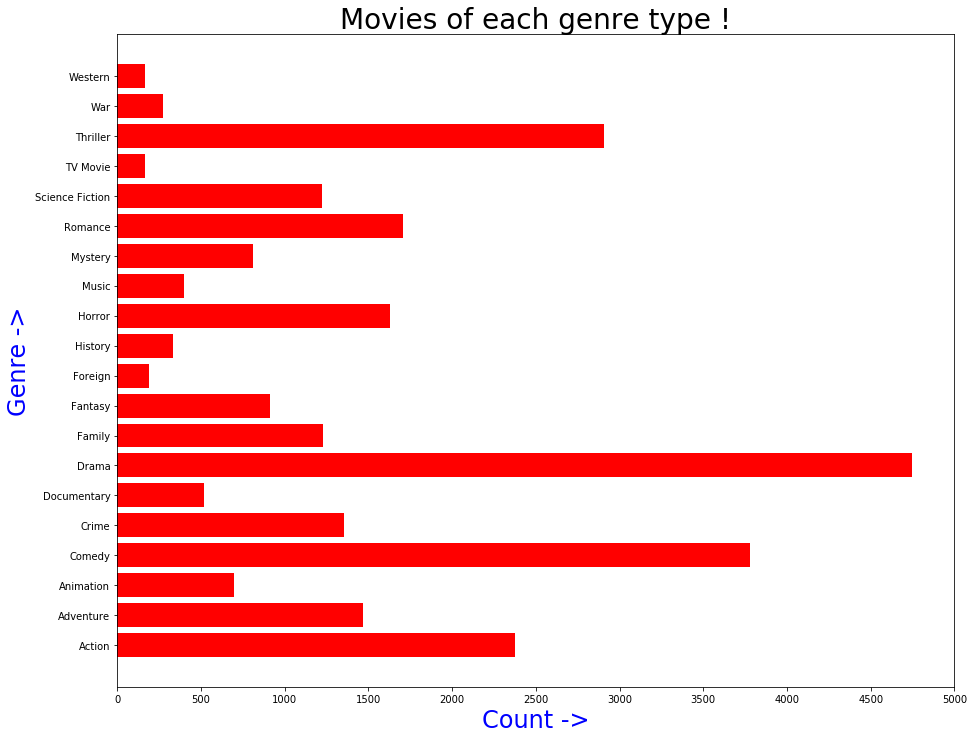

In [66]:
 #setting the figure size 
plt.subplots(figsize=(15,12))
#plotting the graph
plt.barh( rq_2.genre_type , rq_2.no_of_movies ,color='red')
#setting the graph title
plt.title('Movies of each genre type !',color='black', fontsize = 28)
#setting the x-label
plt.xlabel('Count ->',color='b', fontsize = 24)
#setting the y-label
plt.ylabel('Genre ->',color='b', fontsize = 24)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(0,5001,500));


From the genre type plot Drama, comedy, thriller, and action appear to be the most popular genres.

### Research Question 2  (Which month has the most and least number of movies released?!)

In [67]:
#checking which parameters are needed to answer this research question !!
df.head(5)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,6
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,5
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,3
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,12
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,4


In [68]:
#using groupby to get the number of movies released in each month
rq_1=df.groupby(['release_month_num','release_month'],as_index=False)['imdb_id'].count()
#sorting them in the month order
rq_1.sort_values('release_month_num')
#dropping the 'release_month_num' column as it is of no use now !.
rq_1.drop(['release_month_num'],axis=1, inplace=True)

In [69]:
#renaming the column to a more understandble name
rq_1.rename(columns={'imdb_id':'Count'},inplace=True)
#displaying the final dataframe
rq_1


,release_month,Count
0,1,910
1,2,689
2,3,820
3,4,795
4,5,806
5,6,823
6,7,798
7,8,916
8,9,1328
9,10,1146


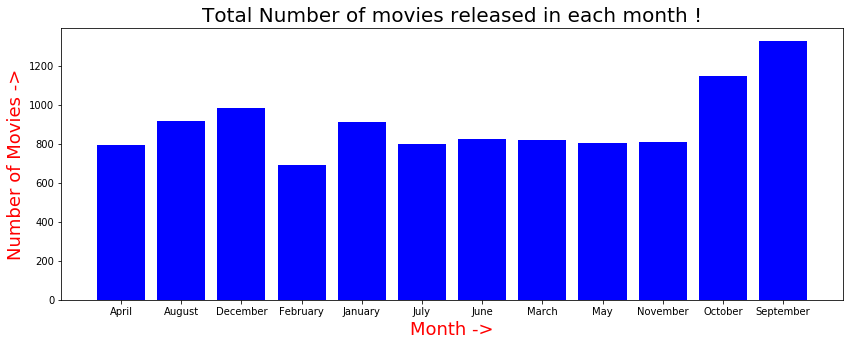

In [51]:
#setting the figure size 
plt.subplots(figsize=(14, 5))
#plotting the graph
plt.bar( rq_1.release_month , rq_1.Count ,color='blue')
#setting the graph title
plt.title('Total Number of movies released in each month !',color='black', fontsize = 20
)
#setting the x-label
plt.xlabel('Month ->',color='r', fontsize = 18)
#setting the y-label
plt.ylabel('Number of Movies ->',color='r', fontsize = 18);

As can be seen from the graph above, the highest number of films are released in September. In the month of February, the smallest number of films are released.

#### Research Question 3  (What kinds of attributes are related with high-grossing films??!)

In [70]:
 #checking which columns of data are required to answer the question!
df.head(3)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,6
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,5
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,3


In [71]:
#checking the total number of entries
df.shape


(10824, 18)

In [72]:
#finding the mean of the revenue_adj 
revenue_mean=df['revenue_adj'].mean()


I had taken revenue_adj here because of the inflation with time

In [73]:
 #finding queries with higher revenues
rq_3=df[df['revenue_adj']>=revenue_mean]


In [74]:
 #Confirming the result
rq_3.head(3)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,6
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,5
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,3


In [75]:
 #defining the co-relation table
corr_values=rq_3.corr()
corr_values

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_num
popularity,1.000000,0.414713,0.581554,0.155332,0.756818,0.320795,0.271959,0.357696,0.492242,0.007842
budget,0.414713,1.000000,0.659116,0.172968,0.543416,-0.027132,0.465732,0.953269,0.450217,-0.011462
revenue,0.581554,0.659116,1.000000,0.179199,0.734180,0.208790,0.297348,0.615249,0.870671,0.008572
runtime,0.155332,0.172968,0.179199,1.000000,0.222524,0.358697,-0.094126,0.245524,0.212543,0.166854
vote_count,0.756818,0.543416,0.734180,0.222524,1.000000,0.411464,0.333613,0.474181,0.606408,-0.016262
vote_average,0.320795,-0.027132,0.208790,0.358697,0.411464,1.000000,-0.143684,-0.018139,0.269783,0.167043
release_year,0.271959,0.465732,0.297348,-0.094126,0.333613,-0.143684,1.000000,0.283264,-0.027144,-0.110535
budget_adj,0.357696,0.953269,0.615249,0.245524,0.474181,-0.018139,0.283264,1.000000,0.485582,0.022376
revenue_adj,0.492242,0.450217,0.870671,0.212543,0.606408,0.269783,-0.027144,0.485582,1.000000,0.037857
release_month_num,0.007842,-0.011462,0.008572,0.166854,-0.016262,0.167043,-0.110535,0.022376,0.037857,1.000000


In [76]:
 #total entries with higher revenues !
rq_3.shape

(2259, 18)

Displaying some few lines

In [77]:
#verifying the result
rq_3.head(3)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,6
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,5
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,3


In [78]:
 #defining the co-relation table
corr_values=rq_3.corr()
corr_values


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_num
popularity,1.000000,0.414713,0.581554,0.155332,0.756818,0.320795,0.271959,0.357696,0.492242,0.007842
budget,0.414713,1.000000,0.659116,0.172968,0.543416,-0.027132,0.465732,0.953269,0.450217,-0.011462
revenue,0.581554,0.659116,1.000000,0.179199,0.734180,0.208790,0.297348,0.615249,0.870671,0.008572
runtime,0.155332,0.172968,0.179199,1.000000,0.222524,0.358697,-0.094126,0.245524,0.212543,0.166854
vote_count,0.756818,0.543416,0.734180,0.222524,1.000000,0.411464,0.333613,0.474181,0.606408,-0.016262
vote_average,0.320795,-0.027132,0.208790,0.358697,0.411464,1.000000,-0.143684,-0.018139,0.269783,0.167043
release_year,0.271959,0.465732,0.297348,-0.094126,0.333613,-0.143684,1.000000,0.283264,-0.027144,-0.110535
budget_adj,0.357696,0.953269,0.615249,0.245524,0.474181,-0.018139,0.283264,1.000000,0.485582,0.022376
revenue_adj,0.492242,0.450217,0.870671,0.212543,0.606408,0.269783,-0.027144,0.485582,1.000000,0.037857
release_month_num,0.007842,-0.011462,0.008572,0.166854,-0.016262,0.167043,-0.110535,0.022376,0.037857,1.000000


## Creating the scatterplot

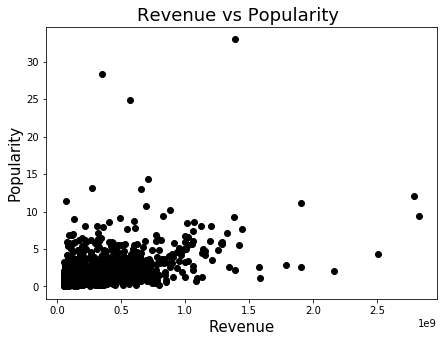

In [79]:

#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=rq_3['revenue_adj'], y=rq_3['popularity'],color='black')
#setting the x-label
plt.xlabel('Revenue',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Popularity',color='black', fontsize = 15)
#setting the graph title
plt.title('Revenue vs Popularity ', fontsize = 18);

From the above correlation, we can see that the Revenue is co-related maximum with
Popularity.

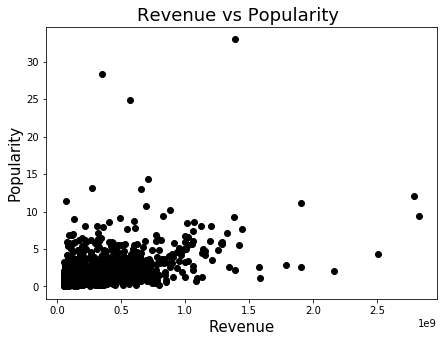

In [62]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=rq_3['revenue_adj'], y=rq_3['popularity'],color='black')
#setting the x-label
plt.xlabel('Revenue',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Popularity',color='black', fontsize = 15)
#setting the graph title
plt.title('Revenue vs Popularity ', fontsize = 18);

In [ ]:
From the above correlation, we can see that the Revenue is co-related maximum with
Popularity.

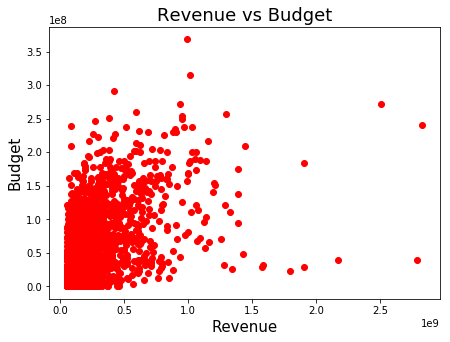

In [81]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=rq_3['revenue_adj'], y=rq_3['budget_adj'],color='red')
#setting the x-label
plt.xlabel('Revenue',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Budget',color='black', fontsize = 15)
#setting the graph title
plt.title('Revenue vs Budget',color='black', fontsize = 18);


From the above correlation, we can see that the Revenue is co-related maximum with budget .

# <a id='conclusions'></a>
## Conclusions

1.The majority of films are released in September, October, December, and January.
2.The most well-known genres are drama, comedy, thriller, action, and romance.
3.Robert De Niro has appeared in the most films (72), followed by Samuel L. Jackson and Bruce Willis, who have appeared in 71 and 62 films, respectively.
4.High-grossing films are usually big-budget films that attract a lot of attention and votes.
5.The least well-known genres are history, war, foreign, television film, and western.
6.Woody Allen has directed the most films (46), followed by Clint Eastwood and Martin Scorsese, who have directed 34 and 31 films, respectively.
7.It seems that the runtime has declined over time . People love to see short movies instead of long movies .
8.It seems that popularity of movies have increased over time. People have started showing love to movies. Also we can say quality movies are also being produced over time.
9.Taking inflation into consideration, the Budget of movies have decreased from the past two decades.
10.When inflation is taken into account, movie revenue has declined from the 1960s and 1970s.
11.It appears that movie profits have risen over time. However, when inflation is taken into account, cinema profits have decreased during the 1960s and 1970s.



## Limitations

1.Because there are so many null values in the data, it doesn't appear to be completely accurate.

2.It also has certain unjustified values, such as budgets, revenues, and movie run-times that are somewhere around 0,2 or minimum, which is not conceivable in my opinion.



In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0